In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


Importing the dependencies


Data collection and processing

In [3]:
# loading csv data to a pandas DataFrame
heart_data= pd.read_csv("framingham.csv")
heart_data.drop(['education'], axis=1, inplace=True)


In [4]:
# print first 5 rows of the data set
heart_data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
# print last 5 rows of the data set
heart_data.tail()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


In [6]:
# checking number of rows and column in the data set
heart_data.shape

(4240, 15)

In [7]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   currentSmoker    4240 non-null   int64  
 3   cigsPerDay       4211 non-null   float64
 4   BPMeds           4187 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4190 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4221 non-null   float64
 12  heartRate        4239 non-null   float64
 13  glucose          3852 non-null   float64
 14  TenYearCHD       4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 497.0 KB


In [8]:
# checking for missing valus
heart_data.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
count =0
for i in heart_data.isnull().sum(axis=1):
  if i>0 :
    count = count +1
    print('total number of rows with missing values is ', count)
    print ( 'since it is only ', round((count/len(heart_data .index))*100), 'percent of the entire dataset the rows with missing values are excluded')








total number of rows with missing values is  1
since it is only  0 percent of the entire dataset the rows with missing values are excluded
total number of rows with missing values is  2
since it is only  0 percent of the entire dataset the rows with missing values are excluded
total number of rows with missing values is  3
since it is only  0 percent of the entire dataset the rows with missing values are excluded
total number of rows with missing values is  4
since it is only  0 percent of the entire dataset the rows with missing values are excluded
total number of rows with missing values is  5
since it is only  0 percent of the entire dataset the rows with missing values are excluded
total number of rows with missing values is  6
since it is only  0 percent of the entire dataset the rows with missing values are excluded
total number of rows with missing values is  7
since it is only  0 percent of the entire dataset the rows with missing values are excluded
total number of rows with m

In [10]:
heart_data.dropna(axis=0, inplace = True)

In [11]:
# statistical measure of the data
heart_data.describe()


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.445215,49.573447,0.488403,9.008531,0.030392,0.005599,0.311917,0.027193,236.928019,132.368435,82.938550,25.808288,75.704079,81.880032,0.152493
std,0.497056,8.570204,0.499932,11.925097,0.171686,0.074623,0.463338,0.162666,44.611594,22.046522,11.932779,4.065599,11.956382,23.882233,0.359546
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.085000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [12]:
# checking the distribution of target variable
heart_data['TenYearCHD'].value_counts()

0    3179
1     572
Name: TenYearCHD, dtype: int64

It means there are 3179 people with defective heart and 572 people with risk of heart disease.

1---> defective heart



0---< healthy heart

In [13]:
# spiliting the features and Target
X= heart_data.drop(columns='TenYearCHD',axis=1)
Y=heart_data['TenYearCHD']

In [14]:
print(X)

      male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0        1   39              0         0.0     0.0                0   
1        0   46              0         0.0     0.0                0   
2        1   48              1        20.0     0.0                0   
3        0   61              1        30.0     0.0                0   
4        0   46              1        23.0     0.0                0   
...    ...  ...            ...         ...     ...              ...   
4233     1   50              1         1.0     0.0                0   
4234     1   51              1        43.0     0.0                0   
4237     0   52              0         0.0     0.0                0   
4238     1   40              0         0.0     0.0                0   
4239     0   39              1        30.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  
0                0         0    195.0  106.0   70.0  26.97       8

In [15]:
print(Y)

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4237    0
4238    0
4239    0
Name: TenYearCHD, Length: 3751, dtype: int64


Spliting the data into Training data and Test data

In [16]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.25, random_state=5)

In [17]:
print (X.shape, X_train.shape,X_test.shape)

(3751, 14) (2813, 14) (938, 14)


Model Training :

Logistic Regression:

In [18]:
model=LogisticRegression()

In [19]:
# training the LogisticRegression model with Training data
model.fit( X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evalution

Accuracy Score

In [20]:
# # accuracy on Training data
# X_train_prediction=model.predict(X_train)
# training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
# #print("accuracy on training data:", training_data_accuracy)

In [21]:
# accuracy on Test data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print("accuracy on test data:", test_data_accuracy)

accuracy on test data: 0.8816631130063965


Accuracy calculation

In [22]:
print("accuracy on test data:",model.score(X_test,Y_test))

accuracy on test data: 0.8816631130063965


<Axes: >

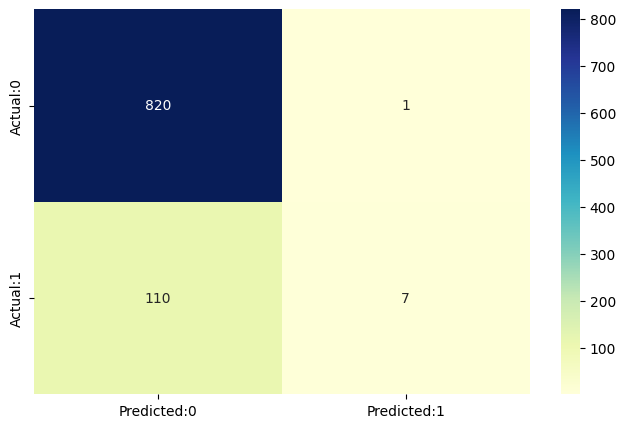

In [23]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,X_test_prediction)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap="YlGnBu")

In [26]:
input_data=(46,2,1,20,0,0,0,0,291,112,78,23.38,80,89)

# change the input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)

# reshape the numpy array as we are predecting for one instance
input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
  print("The person doesn't have any heart diseases")
else:
  print("The person has heart disases")


[1]
The person has heart disases


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
